In [1]:
import numpy as np
import pandas as pd
import os

from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [3]:
base_dir_path = '/gdrive/MyDrive/Forecasting - DSI Capstone Spring \'21/Colabs'

In [ ]:
data_pkl_paths = dict(
    store={
      'training': os.path.join(base_dir_path, 'preprocessed_data/train_ca1_store.pkl'),
      'test': os.path.join(base_dir_path, 'preprocessed_data/test_ca1_store_no_features.pkl')
      },
    product={
      'training': os.path.join(base_dir_path, 'preprocessed_data/train_ca1_store_product.pkl'),
      'test': os.path.join(base_dir_path, 'preprocessed_data/test_ca1_store_product_no_features.pkl')
      },
)

prediction_csv_paths = dict(
    store={
      'nbeats': os.path.join(base_dir_path, 'predictions/nbeats_store_test.csv'),
      'lgbm': os.path.join(base_dir_path, 'predictions/nonrec_lgbm_store_prediction.csv'),
      'seq2seq': os.path.join(base_dir_path, 'predictions/seq2seq_store.csv'),
    },
    product={
      'nbeats': os.path.join(base_dir_path, 'predictions/nbeats_product_test.csv'),
      'lgbm': os.path.join(base_dir_path, 'predictions/nonrec_lgbm_store_product_prediction.csv'),
      'seq2seq': os.path.join(base_dir_path, 'predictions/seq2seq_store_product.csv'),
    },
    foods_586={
        'nbeats': os.path.join(base_dir_path, 'predictions/nbeats_product_test_FOODS_3_586.csv'),
        'lgbm': os.path.join(base_dir_path, 'predictions/nonrec_lgbm_store_product_prediction_foods_3_586.csv'),
        'seq2seq': os.path.join(base_dir_path, 'predictions/seq2seq_FOODS_3_586.csv'),
    },
    household_266={
        'nbeats': os.path.join(base_dir_path, 'predictions/nbeats_product_test_HOUSEHOLD_2_266.csv'),
        'lgbm': os.path.join(base_dir_path, 'predictions/nonrec_lgbm_store_product_prediction_household_2_266.csv'),
        'seq2seq': os.path.join(base_dir_path, 'predictions/seq2seq_HOUSEHOLD_2_266.csv'),
    },
    household_175={
        'nbeats': os.path.join(base_dir_path, 'predictions/nbeats_product_test_HOUSEHOLD_2_175.csv'),
        'lgbm': os.path.join(base_dir_path, 'predictions/nonrec_lgbm_store_product_prediction_household_2_175.csv'),
        'seq2seq': os.path.join(base_dir_path, 'predictions/seq2seq_HOUSEHOLD_2_175.csv'),
    },
    product_household={
      'nbeats': os.path.join(base_dir_path, 'predictions/nbeats_product_test_HOUSEHOLD.csv'),
      'lgbm': os.path.join(base_dir_path, 'predictions/nonrec_lgbm_store_product_prediction_household.csv'),
      'seq2seq': os.path.join(base_dir_path, 'predictions/seq2seq_store_product_prediction_HOUSEHOLD.csv'),
    },
    product_hobbies={
      'nbeats': os.path.join(base_dir_path, 'predictions/nbeats_product_test_HOBBIES.csv'),
      'lgbm': os.path.join(base_dir_path, 'predictions/nonrec_lgbm_store_product_prediction_hobbies.csv'),
      'seq2seq': os.path.join(base_dir_path, 'predictions/seq2seq_store_product_prediction_HOBBIES.csv'),
    },
    product_foods={
      'nbeats': os.path.join(base_dir_path, 'predictions/nbeats_product_test_FOODS.csv'),
      'lgbm': os.path.join(base_dir_path, 'predictions/nonrec_lgbm_store_product_prediction_foods.csv'),
      'seq2seq': os.path.join(base_dir_path, 'predictions/seq2seq_store_product_prediction_FOODS.csv'),
    },
)

In [ ]:
# product-level
sales_product = pd.read_pickle(data_pkl_paths['product']['test'])
sales_product_pred_nbeats = pd.read_csv(prediction_csv_paths['product']['nbeats'])
sales_product_pred_lgbm = pd.read_csv(prediction_csv_paths['product']['lgbm'])
sales_product_pred_seq2seq = pd.read_csv(prediction_csv_paths['product']['seq2seq'])


In [ ]:
# store-level
sales_store = pd.read_pickle(data_pkl_paths['store']['test'])
sales_store_pred_nbeats = pd.read_csv(prediction_csv_paths['store']['nbeats'])
sales_store_pred_lgbm = pd.read_csv(prediction_csv_paths['store']['lgbm'])
sales_store_pred_seq2seq = pd.read_csv(prediction_csv_paths['store']['seq2seq'])


In [ ]:
sales_store_pred_seq2seq.rename(columns={'predicted_sales':'pred_sales'}, inplace=True)

In [ ]:
sales_store_pred_nbeats['date'] = pd.to_datetime(sales_store_pred_nbeats['date'])
sales_store_pred_lgbm['date'] = pd.to_datetime(sales_store_pred_lgbm['date'])
sales_store_pred_seq2seq['date'] = pd.to_datetime(sales_store_pred_seq2seq['date'])

In [ ]:

print(sales_store_pred_nbeats.columns)
print(sales_store_pred_lgbm.columns)
print(sales_store_pred_seq2seq.columns)

print(sales_store_pred_nbeats.shape)
print(sales_store_pred_lgbm.shape)
print(sales_store_pred_seq2seq.shape)

print(sales_store_pred_nbeats.dtypes)
print(sales_store_pred_lgbm.dtypes)
print(sales_store_pred_seq2seq.dtypes)

Index(['d', 'date', 'pred_sales', 'model'], dtype='object')
Index(['date', 'pred_sales', 'model'], dtype='object')
Index(['d', 'date', 'pred_sales', 'model'], dtype='object')
(28, 4)
(28, 3)
(28, 4)
d                     object
date          datetime64[ns]
pred_sales           float64
model                 object
dtype: object
date          datetime64[ns]
pred_sales           float64
model                 object
dtype: object
d                     object
date          datetime64[ns]
pred_sales           float64
model                 object
dtype: object


In [ ]:
ensemble_store = pd.concat([
           sales_store_pred_nbeats[['date','pred_sales']], 
           sales_store_pred_lgbm[['date','pred_sales']], 
           sales_store_pred_seq2seq[['date','pred_sales']]
           ]).groupby('date').agg('mean').reset_index()

ensemble_store.to_csv('ensemble_store.csv')

In [ ]:
sales_product_pred_nbeats.rename(columns={'sales':'pred_sales'}, inplace=True)

In [ ]:
sales_product_pred_nbeats['date'] = pd.to_datetime(sales_product_pred_nbeats['date'])
sales_product_pred_lgbm['date'] = pd.to_datetime(sales_product_pred_lgbm['date'])
sales_product_pred_seq2seq['date'] = pd.to_datetime(sales_product_pred_seq2seq['date'])

In [ ]:

print(sales_product_pred_nbeats.columns)
print(sales_product_pred_lgbm.columns)
print(sales_product_pred_seq2seq.columns)

print(sales_product_pred_nbeats.shape)
print(sales_product_pred_lgbm.shape)
print(sales_product_pred_seq2seq.shape)

print(sales_product_pred_nbeats.dtypes)
print(sales_product_pred_lgbm.dtypes)
print(sales_product_pred_seq2seq.dtypes)


Index(['item_id', 'date', 'pred_sales', 'd', 'model'], dtype='object')
Index(['item_id', 'date', 'pred_sales', 'model'], dtype='object')
Index(['Unnamed: 0', 'd', 'date', 'item_id', 'pred_sales'], dtype='object')
(85260, 5)
(85329, 4)
(85372, 5)
item_id               object
date          datetime64[ns]
pred_sales           float64
d                     object
model                 object
dtype: object
item_id               object
date          datetime64[ns]
pred_sales           float64
model                 object
dtype: object
Unnamed: 0             int64
d                     object
date          datetime64[ns]
item_id               object
pred_sales           float64
dtype: object


In [ ]:
ensemble_product = pd.concat([
           sales_product_pred_nbeats[['item_id','date','pred_sales']], 
           sales_product_pred_lgbm[['item_id','date','pred_sales']], 
           sales_product_pred_seq2seq[['item_id','date','pred_sales']]
           ])

ensemble_product = ensemble_product.groupby(['item_id','date']).agg(
    item_id_count = ('item_id', 'count'),
    pred_sales_mean = ('pred_sales','mean')
).reset_index()

ensemble_product = ensemble_product.loc[ensemble_product.item_id_count == 3]
# ensemble_product.columns = ensemble_product.columns.droplevel(0)
# ensemble_store.to_csv('ensemble_store.csv')

In [ ]:
ensemble_product.to_csv('ensemble_product.csv')

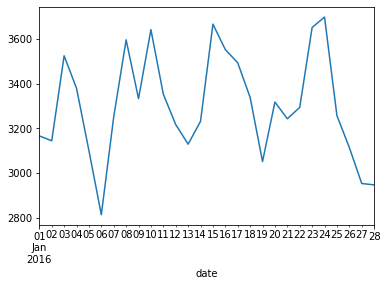

In [ ]:
ensemble_product.groupby('date')['pred_sales_mean'].sum().plot()

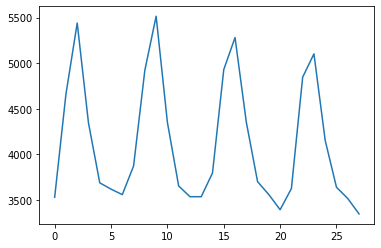

In [ ]:
ensemble_store['pred_sales'].plot()

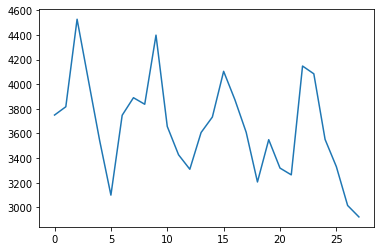

In [ ]:
# NBEATS
agg_product_pred_nbeats = sales_product_pred_nbeats[['item_id','date','pred_sales']].groupby('date').sum('pred_sales').reset_index()
ensemble_nbeats = pd.concat([agg_product_pred_nbeats, sales_store_pred_nbeats[['date','pred_sales']]]).groupby('date')['pred_sales'].mean().reset_index()
ensemble_nbeats['pred_sales'].plot()
ensemble_nbeats.to_csv('ensemble_nbeats.csv')

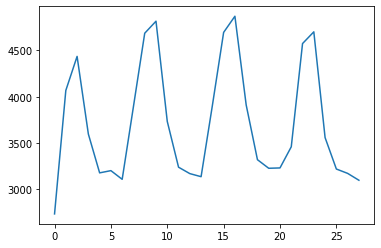

In [ ]:
# LGBM
agg_product_pred_lgbm = sales_product_pred_lgbm[['item_id','date','pred_sales']].groupby('date').sum('pred_sales').reset_index()
ensemble_lgbm = pd.concat([agg_product_pred_lgbm, sales_store_pred_lgbm[['date','pred_sales']]]).groupby('date')['pred_sales'].mean().reset_index()
ensemble_lgbm['pred_sales'].plot()
ensemble_lgbm.to_csv('ensemble_lgbm.csv')

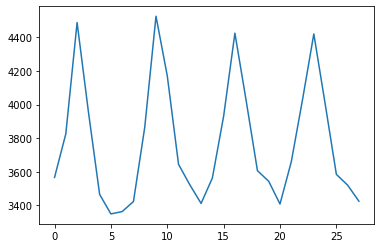

In [ ]:
# seq2seq
agg_product_pred_seq2seq = sales_product_pred_seq2seq[['item_id','date','pred_sales']].groupby('date').sum('pred_sales').reset_index()
ensemble_seq2seq = pd.concat([agg_product_pred_seq2seq, sales_store_pred_seq2seq[['date','pred_sales']]]).groupby('date')['pred_sales'].mean().reset_index()
ensemble_seq2seq['pred_sales'].plot()
ensemble_seq2seq.to_csv('ensemble_seq2seq.csv')

In [5]:
df = pd.read_csv(base_dir_path + '/performance/ensembling_chart.csv')

In [8]:
df = pd.melt(df, id_vars = 'Level')

In [13]:
df

,Level,variable,value
0,Store,three_model_avg,0.542033
1,Product-Store Ensemble,three_model_avg,0.829467
2,Product,three_model_avg,0.959600
3,All,three_model_avg,0.750800
4,Store,LGBM,0.371600
5,Product-Store Ensemble,LGBM,0.659200
6,Product,LGBM,0.983700
7,All,LGBM,0.677600
8,Store,NBEATS,0.530500
9,Product-Store Ensemble,NBEATS,0.919700


In [18]:
df.loc[df.variable == 'three_model_avg']

,Level,variable,value
0,Store,three_model_avg,0.542033
1,Product-Store Ensemble,three_model_avg,0.829467
2,Product,three_model_avg,0.959600
3,All,three_model_avg,0.750800


In [10]:
import matplotlib.pyplot as plt


In [51]:
colors = dict(
    NBEATS = 'C1',
    LGBM = 'C2',
    seq2seq = 'C3',
    Ensemble = 'C4',
    three_model_avg = 'C0',
)

labels = dict(
    NBEATS = 'NBEATS',
    LGBM = 'LGBM',
    seq2seq = 'seq2seq',
    Ensemble = 'Ensemble',
    three_model_avg = 'Non-Ensemble \nAverage',
)

Text(0.5, 1.0, 'Model and Ensemble WRMSSE Performance')

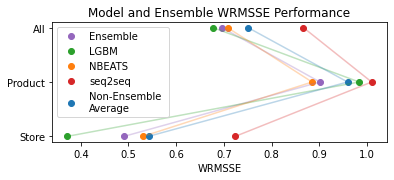

In [60]:
fig, ax = plt.subplots(1,1, figsize=(6,2.2))
plt.plot()
for i in np.unique(df['variable']):
    ax.plot(df.loc[(df.variable == i) & (df.Level != 'Product-Store Ensemble'), 'value'], 
            [1,2,3], 'o', label = labels[i], alpha = 1, c = colors[i])
    ax.set_yticks([1,2,3])
    ax.set_yticklabels(['Store','Product','All'])
plt.legend()

for i in np.unique(df['variable']):
    ax.plot(df.loc[(df.variable == i) & (df.Level != 'Product-Store Ensemble'), 'value'], 
            [1,2,3], label = labels[i], alpha = 0.3, c = colors[i])

plt.xlabel('WRMSSE')
plt.title("Model and Ensemble WRMSSE Performance")